# ERA5 Forcing Data Visualization 
*This script visualizes ERA5 data over the Southern Rocky Mountains High Altitude Tundra (EPA L4 Ecoregion)*

### TODO
- I would like to aggregate the daily by month (all time steps in each file) and create a map that show trends over the SRM region's tp trends from ERA5.
- Get a monthly average over the whole region and plot the trends over time by variable
- Possibly partition further into zones like San Juans, Sangre de Cristos, Front Range, Never Summer/Rawah/Flattops range, etc.

In [38]:
import os
import gzip
import shutil
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing and Settings 
era_var_dir = "/glade/campaign/cgd/tss/common/lm_forcing/era5land/daily/raw/"
output_data_dir = "/glade/u/home/milesmoore/data/era5_srm/"


In [50]:
# Get list of variables to process
var_list = [var for var in os.listdir(era_var_dir) if "README" not in var]

# Lets do a test run with total_precipitation first 
precip_dir = os.path.join(era_var_dir, "total_precipitation")
precip_fns = os.listdir(precip_dir)

sorted(precip_fns)
# var_list

['total_precipitation.195001.nc.gz',
 'total_precipitation.195002.nc.gz',
 'total_precipitation.195003.nc.gz',
 'total_precipitation.195004.nc.gz',
 'total_precipitation.195005.nc.gz',
 'total_precipitation.195006.nc.gz',
 'total_precipitation.195007.nc.gz',
 'total_precipitation.195008.nc.gz',
 'total_precipitation.195009.nc.gz',
 'total_precipitation.195010.nc.gz',
 'total_precipitation.195011.nc.gz',
 'total_precipitation.195012.nc.gz',
 'total_precipitation.195101.nc.gz',
 'total_precipitation.195102.nc.gz',
 'total_precipitation.195103.nc.gz',
 'total_precipitation.195104.nc.gz',
 'total_precipitation.195105.nc.gz',
 'total_precipitation.195106.nc.gz',
 'total_precipitation.195107.nc.gz',
 'total_precipitation.195108.nc.gz',
 'total_precipitation.195109.nc.gz',
 'total_precipitation.195110.nc.gz',
 'total_precipitation.195111.nc.gz',
 'total_precipitation.195112.nc.gz',
 'total_precipitation.195201.nc.gz',
 'total_precipitation.195202.nc.gz',
 'total_precipitation.195203.nc.gz',
 

In [44]:
# Path to the compressed NetCDF file
compressed_file = os.path.join(precip_dir,'total_precipitation.202006.nc.gz')
# Temporary decompressed file path
decompressed_file = os.path.join(output_data_dir,'total_precipitation.202006.nc')

# Decompress the .gz file
with gzip.open(compressed_file, 'rb') as f_in:
    with open(decompressed_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

FileNotFoundError: [Errno 2] No such file or directory: '/glade/campaign/cgd/tss/common/lm_forcing/era5land/daily/raw/total_precipitation/total_precipitation.202006.nc.gz'

In [26]:
# Open dataset
ds = xr.open_dataset(os.path.join(output_data_dir,'total_precipitation.202005.nc'))
print(ds)


<xarray.Dataset>
Dimensions:    (longitude: 581, latitude: 281, time: 31)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.9 -124.8 ... -67.2 -67.1 -67.0
  * latitude   (latitude) float32 53.0 52.9 52.8 52.7 ... 25.3 25.2 25.1 25.0
  * time       (time) datetime64[ns] 2020-05-01 2020-05-02 ... 2020-05-31
Data variables:
    tp         (time, latitude, longitude) float32 ...


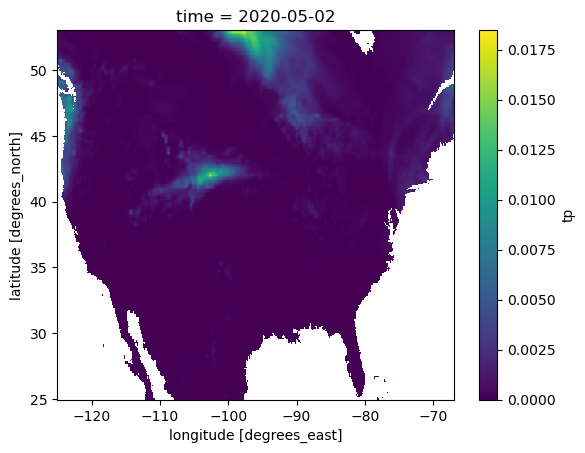

In [39]:
ds['tp'].isel(time=1).plot()
